<a href="https://colab.research.google.com/github/adarshnitt/task3/blob/main/Task_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data=pd.read_csv("/content/SampleSuperstore.csv")

In [ ]:
data.dtypes

In [ ]:
cat_col=data.select_dtypes(include=["object"])
cat_col

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df=pd.DataFrame()


In [ ]:
for j in cat_col.columns:
  df[j+"encode"]=le.fit_transform(data[j])

In [ ]:
df=pd.concat([df,data.select_dtypes(exclude=["object"])],axis=1)

In [ ]:
df

In [ ]:
df.dtypes

In [ ]:
import seaborn as sns
sns.pairplot(df)

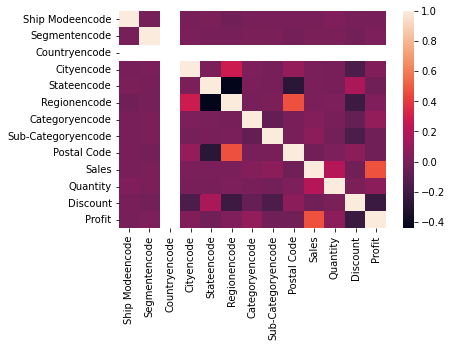

In [72]:
c=df.corr()
sns.heatmap(c)

In [ ]:
df.describe()

In [ ]:
df.info()

In [53]:
data

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [52]:
data.loc[:,["Region","Ship Mode"]].groupby(["Region"]).count()

,Ship Mode
Region,
Central,2323
East,2848
South,1620
West,3203


In [85]:
data.loc[:,["Region","Profit","Sales","Segment","Ship Mode"]].groupby([data["Region"],data["Ship Mode"],data["Segment"]]).sum()

Profit        Sales
Region  Ship Mode      Segment                             
Central First Class    Consumer       988.1009   27211.9780
                       Corporate      347.8167   18335.1094
                       Home Office   2371.3496   13199.8280
        Same Day       Consumer       832.8439   14122.3380
                       Corporate      -67.0008    1735.5000
                       Home Office    766.0366    4557.5720
        Second Class   Consumer       778.5629   38826.1476
                       Corporate     3496.9477   35721.9668
                       Home Office   4839.3243   29001.8910
        Standard Class Consumer      5964.5404  171870.9704
                       Corporate    14926.1384  102203.2366
                       Home Office   4461.7019   44453.3530
East    First Class    Consumer      4333.8697   57261.9520
                       Corporate     2802.2071   18880.9780
                       Home Office   8595.9373   37444.1230
        Same Day       Consumer      4047.7287   20891.1430
                       Corporate     3517.8922   19485.3410
                       Home Office    414.6461    2950.3480
        Second Class   Consumer      6489.9327   63171.6060
                       Corporate     2327.5730   37387.6280
                       Home Office   1969.7851   15986.2900
        Standard Class Consumer     26319.4532  209583.4660
                       Corporate    14974.9066  124655.4000
                       Home Office  15728.8483   71082.9650
South   First Class    Consumer      3875.9891   20802.1730
                       Corporate     3401.4025   20792.6070
                       Home Office   -385.0062    7737.7860
        Same Day       Consumer       894.6900    8132.4090
                       Corporate    -3629.2128    9907.3080
                       Home Office    972.1878    2977.4560
        Second Class   Consumer      5929.8124   49724.2545
                       Corporate     6705.0388   35243.2310
                       Home Office   2032.2957    8791.1270
        Standard Class Consumer     16213.0813  116922.1345
                       Corporate     8737.9947   55942.7865
                       Home Office   2001.1570   54748.6325
West    First Class    Consumer     12176.0839   53892.8620
                       Corporate     7913.0461   47849.7755
                       Home Office   2549.0432   28019.2510
        Same Day       Consumer      4098.9428   17450.4690
                       Corporate     1996.4632   13993.1740
                       Home Office   2046.5412   12160.0670
        Second Class   Consumer     11748.6032   79776.9415
                       Corporate     5696.1536   37773.2130
                       Home Office   5432.6060   27789.2730
        Standard Class Consumer     29426.9741  211760.5005
                       Corporate    18831.7670  126239.1120
                       Home Office   6502.2246   68753.1860

In [90]:
data.loc[:,["Region","Segment"]].groupby([data["Segment"]]).count()

,Region,Segment
Segment,,
Consumer,5191,5191
Corporate,3020,3020
Home Office,1783,1783


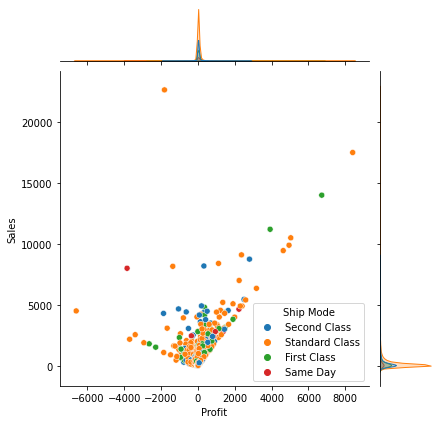

In [56]:
sns.jointplot(data=data,x=data["Profit"],y=data["Sales"],hue=data["Ship Mode"])

ValueError: ignored

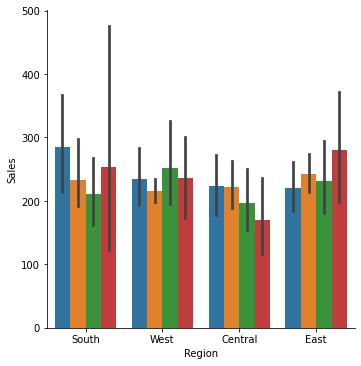

In [62]:
sns.catplot(data=data,kind="bar",x=data["Region"],y=data["Sales"],hue=data["Ship Mode"]);

In [92]:
pd.crosstab(data["Region"],data["Segment"])
# result: only 15% , 272 home ffice are at south so, sales is low as comparatable other regions.

Segment,Consumer,Corporate,Home Office
Region,,,
Central,1212,673,438
East,1469,877,502
South,838,510,272
West,1672,960,571


In [97]:
pd.crosstab(data["Region"],data["Category"])
# lack of technology in south

Category,Furniture,Office Supplies,Technology
Region,,,
Central,481,1422,420
East,601,1712,535
South,332,995,293
West,707,1897,599


In [101]:
pd.crosstab(data["Region"],data["Sub-Category"])

Sub-Category,Accessories,Appliances,Art,Binders,Bookcases,Chairs,Copiers,Envelopes,Fasteners,Furnishings,Labels,Machines,Paper,Phones,Storage,Supplies,Tables
Region,,,,,,,,,,,,,,,,,
Central,183,123,176,366,50,154,16,59,55,205,76,21,321,200,210,36,72
East,206,126,228,440,70,168,20,74,61,283,107,37,378,272,242,56,80
South,128,81,142,246,28,88,7,54,29,165,65,18,221,140,128,29,51
West,258,136,250,471,80,207,25,67,72,304,116,39,450,277,266,69,116


In [105]:
data.loc[:,["Sub-Category"]].groupby(data["Region"]).count()
# lowest sub category in south

,Sub-Category
Region,
Central,2323
East,2848
South,1620
West,3203


In [ ]:
data.loc[:,["Region","Category"]].groupby(data[""])

In [70]:
data.loc[:,["Sales","Region","Ship Mode"]].groupby([data["Region"],data["Ship Mode"]]).sum()

Sales
Region  Ship Mode                  
Central First Class      58746.9154
        Same Day         20415.4100
        Second Class    103550.0054
        Standard Class  318527.5600
East    First Class     113587.0530
        Same Day         43326.8320
        Second Class    116545.5240
        Standard Class  405321.8310
South   First Class      49332.5660
        Same Day         21017.1730
        Second Class     93758.6125
        Standard Class  227613.5535
West    First Class     129761.8885
        Same Day         43603.7100
        Second Class    145339.4275
        Standard Class  406752.7985

In [65]:
data.loc[:,["Category","Region","Sales"]].groupby([data["Region"],data["Category"]]).sum()

Sales
Region  Category                    
Central Furniture        163797.1638
        Office Supplies  167026.4150
        Technology       170416.3120
East    Furniture        208291.2040
        Office Supplies  205516.0550
        Technology       264973.9810
South   Furniture        117298.6840
        Office Supplies  125651.3130
        Technology       148771.9080
West    Furniture        252612.7435
        Office Supplies  220853.2490
        Technology       251991.8320

In [66]:
data

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [107]:
pd.crosstab(data["Region"],data["Ship Mode"])
#everthing min in south

Ship Mode,First Class,Same Day,Second Class,Standard Class
Region,,,,
Central,299,120,465,1439
East,490,155,530,1673
South,234,83,329,974
West,515,185,621,1882


In [112]:
data.loc[:,"Discount"].groupby([data["Region"],data["Ship Mode"]]).sum()

Region   Ship Mode     
Central  First Class        79.42
         Same Day           26.90
         Second Class      104.60
         Standard Class    347.42
East     First Class        76.50
         Same Day           25.60
         Second Class       70.00
         Standard Class    241.90
South    First Class        34.30
         Same Day           11.30
         Second Class       36.15
         Standard Class    156.80
West     First Class        62.95
         Same Day           18.95
         Second Class       59.40
         Standard Class    208.90
Name: Discount, dtype: float64

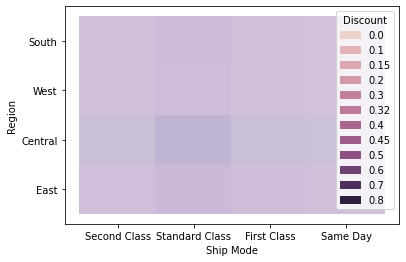

In [121]:
sns.histplot(data=data,x=data["Ship Mode"],y=data["Region"],hue=data["Discount"])

In [160]:
sout=data["Region"]=="South"
s1=data[sout]
s2=s1.loc[:,["City","Profit","Category"]]
s2=s2.reset_index().drop(["index"],axis=1)
s2

,City,Profit,Category
0,Henderson,41.9136,Furniture
1,Henderson,219.5820,Furniture
2,Fort Lauderdale,-383.0310,Furniture
3,Fort Lauderdale,2.5164,Office Supplies
4,Concord,5.4432,Office Supplies
...,...,...,...
1615,Smyrna,42.2250,Office Supplies
1616,Lafayette,22.3548,Furniture
1617,Athens,28.7964,Technology
1618,Athens,55.6470,Technology


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


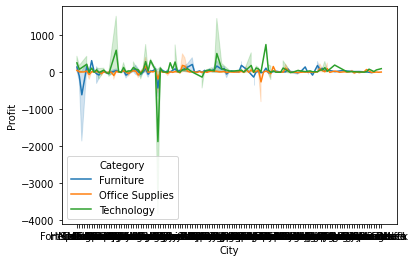

In [161]:
sns.lineplot(s2["City"],y=s2["Profit"],hue=s2["Category"])

In [144]:
s1["City"]

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
12,Standard Class,Consumer,United States,Concord,North Carolina,28027,South,Office Supplies,Paper,15.5520,3,0.20,5.4432
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9971,Standard Class,Home Office,United States,Smyrna,Georgia,30080,South,Office Supplies,Art,140.7500,5,0.00,42.2250
9980,Second Class,Consumer,United States,Lafayette,Louisiana,70506,South,Furniture,Tables,85.9800,1,0.00,22.3548
9987,Standard Class,Corporate,United States,Athens,Georgia,30605,South,Technology,Accessories,79.9900,1,0.00,28.7964
9988,Standard Class,Corporate,United States,Athens,Georgia,30605,South,Technology,Phones,206.1000,5,0.00,55.6470


In [ ]:
# Conclusion:
To increase Profit:
1- MAke more investment over south.
2- Investment must followed by Technology
3- We can follow West Region Management in south to increase overall Profit